<a href="https://colab.research.google.com/github/bahamalytixs/BahamaLytixs/blob/master/Proj_Python_Jupyter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3

### Setup for Data Extraction

In [10]:
import yfinance as yf
import pandas as pd

### Tesla Stock Ticker

In [65]:
tesla = yf.Ticker("TSLA")  

In [66]:
tesla_info = tesla.info
#tesla_info   Commented to save space

# Combined Stock Data for Multiple Tickers - Share Prices Using yFinance
### *Telsa and GameStop Stocks*

In [67]:
#data = yf.download("TSLA GME", start="2017-01-01", end="2017-04-30", group_by='tickers')
data = yf.download("TSLA GME", period="3mo", interval="1wk", group_by='tickers')
data

[*********************100%***********************]  2 of 2 completed


GME                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2022-01-10  134.990005  136.800003  112.019997  116.650002  116.650002   
2022-01-17  113.110001  115.199997   92.720001  106.360001  106.360001   
2022-01-24   99.019997  119.000000   86.290001   97.910004   97.910004   
2022-01-31   97.870003  116.650002   95.080002  102.339996  102.339996   
2022-02-07  102.989998  131.779999   98.769997  124.250000  124.250000   
2022-02-14  122.930000  132.850006  116.150002  121.529999  121.529999   
2022-02-21  118.199997  125.709999  104.120003  118.580002  118.580002   
2022-02-28  121.000000  126.290001  110.580002  111.660004  111.660004   
2022-03-07  115.000000  115.000000   92.690002   92.690002   92.690002   
2022-03-14   93.430000   97.449997   77.580002   90.790001   90.790001   
2022-03-21   90.000000  158.160004   89.760002  151.949997  151.949997   
2022-03-28  151.979996  199.410004  151.539993  165.000000  165.000000   
2022-04-04  166.979996  173.240005  141.570007  146.190002  146.190002   
2022-04-08  149.089996  150.710602  142.029999  146.190002  146.190002   

                             TSLA                                         \
              Volume         Open         High          Low        Close   
Date                                                                       
2022-01-10  15745400  1000.000000  1115.599976   980.000000  1049.609985   
2022-01-17  14609300  1026.609985  1070.790039   940.500000   943.900024   
2022-01-24  25935400   904.760010   987.690002   792.010010   846.349976   
2022-01-31  14824600   872.710022   943.700012   862.049988   923.320007   
2022-02-07  17117500   923.789978   947.770020   850.700012   860.000000   
2022-02-14   9373100   861.570007   926.429993   837.609985   856.979980   
2022-02-21   6853900   834.130005   856.729980   700.000000   809.869995   
2022-02-28   6594600   815.010010   889.880005   814.710022   838.289978   
2022-03-07  10282500   856.299988   866.140015   782.169983   795.349976   
2022-03-14  23087500   780.609985   907.849976   756.039978   905.390015   
2022-03-21  66054200   914.979980  1040.699951   907.090027  1010.640015   
2022-03-28  67901300  1065.099976  1114.770020  1053.599976  1084.589966   
2022-04-04  19062100  1089.380005  1152.869995  1021.539978  1025.489990   
2022-04-08   2501839  1043.209961  1048.439941  1022.434998  1025.489990   

                                    
              Adj Close     Volume  
Date                                
2022-01-10  1049.609985  137250500  
2022-01-17   943.900024  105363500  
2022-01-24   846.349976  208309200  
2022-01-31   923.320007  132282700  
2022-02-07   860.000000  103251900  
2022-02-14   856.979980  100005700  
2022-02-21   809.869995  129978300  
2022-02-28   838.289978  125680100  
2022-03-07   795.349976  112514700  
2022-03-14   905.390015  129610200  
2022-03-21  1010.640015  146492900  
2022-03-28  1084.589966  113005800  
2022-04-04  1025.489990  128595500  
2022-04-08  1025.489990   18337896

In [68]:
# data is pd.Dataframe
type(data)

pandas.core.frame.DataFrame

# * W E B S C R A P I N G *


## Tesla Revenue Data - Webscraping

In [69]:
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4
!pip install plotly==5.3.1

/bin/bash: mamba: command not found
/bin/bash: mamba: command not found


In [70]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [71]:
import requests
#url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html'
#tesla_url = 'https://finance.yahoo.com/quote/TSLA/financials?p=TSLA'
tesla_url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
htmlTesla_data = requests.get(tesla_url).text

In [72]:
# Parse Url data to HTML = BeautifulSoup
soupTesla = BeautifulSoup(htmlTesla_data, 'html5lib')

In [73]:
# Get all TESLA tables - Look for tag 'table'
tesla_tble = soupTesla.find_all('table')
# tesla_tble     # commented to save space


In [74]:
# Find right table in df of tables
for index,table in enumerate(tesla_tble):
    #if ("Tesla Annual Revenue" in str(table)):
    if ("%"+"Tesla"+"%"+"Revenue"+"%" in str(table)):   #Just in case, have name variation   
        #table_index = index
        pass        
#print(table_index)
print(index)

5


In [75]:
# Want the 1st col of table

tesla_data = pd.read_html(str(tesla_tble[1]), flavor='bs4')[0]
tesla_data

,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
0,2021-12-31,"$17,719"
1,2021-09-30,"$13,757"
2,2021-06-30,"$11,958"
3,2021-03-31,"$10,389"
4,2020-12-31,"$10,744"
5,2020-09-30,"$8,771"
6,2020-06-30,"$6,036"
7,2020-03-31,"$5,985"
8,2019-12-31,"$7,384"
9,2019-09-30,"$6,303"


In [76]:
# Using more readable column names
#tesla_data.rename(columns={'Tesla Quarterly Revenue(Millions of US$)': 'Date', 'Tesla Quarterly Revenue(Millions of US$).1': 'Rev'}, inplace=True)
#tesla_data
tesla_data.rename(columns={'Tesla Quarterly Revenue(Millions of US $)': 'Date', 'Tesla Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace=True)
tesla_data

,Date,Revenue
0,2021-12-31,"$17,719"
1,2021-09-30,"$13,757"
2,2021-06-30,"$11,958"
3,2021-03-31,"$10,389"
4,2020-12-31,"$10,744"
5,2020-09-30,"$8,771"
6,2020-06-30,"$6,036"
7,2020-03-31,"$5,985"
8,2019-12-31,"$7,384"
9,2019-09-30,"$6,303"


In [77]:
list(tesla_data.columns)  #working code

['Date', 'Revenue']

In [78]:
# Trying to combine DF list
#horStack = pd.concat(tesla_DF_list[0], tesla_DF_list[1], axis=1)
#horStack

In [79]:
type(tesla_data)   #Verify type of data object

pandas.core.frame.DataFrame

### Tesla Stock & Revenue Dashboard **respectively**

In [80]:
# Extracting specific period data
tesla_Stck = yf.download("TSLA", period="3mo", interval="1wk")
tesla_Stck
#tesla_Stck = tesla_Stck[["Date", "Close"]]

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-10,1000.000000,1115.599976,980.000000,1049.609985,1049.609985,137250500
2022-01-17,1026.609985,1070.790039,940.500000,943.900024,943.900024,105363500
2022-01-24,904.760010,987.690002,792.010010,846.349976,846.349976,208309200
2022-01-31,872.710022,943.700012,862.049988,923.320007,923.320007,132282700
2022-02-07,923.789978,947.770020,850.700012,860.000000,860.000000,103251900
2022-02-14,861.570007,926.429993,837.609985,856.979980,856.979980,100005700
2022-02-21,834.130005,856.729980,700.000000,809.869995,809.869995,129978300
2022-02-28,815.010010,889.880005,814.710022,838.289978,838.289978,125680100
2022-03-07,856.299988,866.140015,782.169983,795.349976,795.349976,112514700


In [81]:
#  Get TWO Main columns for STOCK DATA (Date, Close)
tesla_Stck.reset_index(inplace=True)
tesla_Stck = tesla_Stck[["Date", "Close"]]
tesla_Stck

,Date,Close
0,2022-01-10,1049.609985
1,2022-01-17,943.900024
2,2022-01-24,846.349976
3,2022-01-31,923.320007
4,2022-02-07,860.000000
5,2022-02-14,856.979980
6,2022-02-21,809.869995
7,2022-02-28,838.289978
8,2022-03-07,795.349976
9,2022-03-14,905.390015


In [82]:
type(tesla_Stck)

pandas.core.frame.DataFrame

In [110]:
# Function to graph ANY STOCK data

def make_graphStck(df, name):
    
    #return df.plot(x=df[0], y=df[1])
    return df.plot(x= "Date", y= "Close", title=name)


In [84]:
#import matplotlib.pyplot as plt
#%matplotlib inline

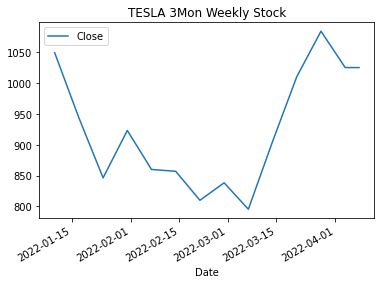

In [109]:
# Call to plot TESLA Stock data

make_graphStck(tesla_Stck, "TESLA 3Mon Weekly Stock")

In [86]:
# Function to plot Revenue data

def make_graphRev(df, name):  
    
    return df.plot(x="Date", y = "Revenue", title=name)
 

In [87]:
# TELSA data stored in 'tesla_data'

tesla_data.reset_index()
tesla_RevData = tesla_data   # Get copy of 


In [88]:
#https://pbpython.com/currency-cleanup.html
# TESLA data stores in 'tesla_data'

tesla_dfCopy = tesla_data.copy  #Make copy of orig data frame
tesla_RevData['Revenue'] = tesla_RevData['Revenue'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)


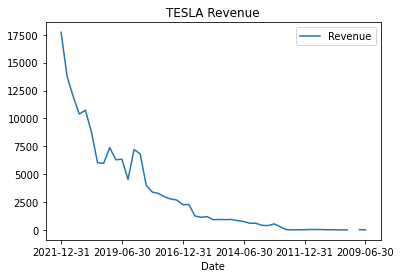

In [89]:
# Function call to plot TESLA REVENUE data

make_graphRev(tesla_RevData, "TESLA Revenue")

### GameStop Revenue Data - Webscraping

In [90]:
#import requests
#url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html'
game_url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
htmlGame_data = requests.get(game_url).text

In [91]:
# Parse Url data to HTML = BeautifulSoup
soupGame = BeautifulSoup(htmlGame_data, 'html5lib')

In [92]:
# Get all rows
Game_tble = soupGame.find_all('table')
# game_rows   # commented to save space


In [93]:
for index,table in enumerate(Game_tble):
    if ("%Game"+"%Revenue%" in str(table)):
        pass      #table_index = index
print(index)

5


In [94]:
gme = yf.Ticker("GME")

In [101]:
#Data extraction from table1
game_RevData = pd.read_html(str(Game_tble[1]), flavor='bs4')[0]
#tesla_data.columns = ["Date", "Rev"]
game_RevData

,GameStop Quarterly Revenue(Millions of US $),GameStop Quarterly Revenue(Millions of US $).1
0,2021-10-31,"$1,297"
1,2021-07-31,"$1,183"
2,2021-04-30,"$1,277"
3,2021-01-31,"$2,122"
4,2020-10-31,"$1,005"
5,2020-07-31,$942
6,2020-04-30,"$1,021"
7,2020-01-31,"$2,194"
8,2019-10-31,"$1,439"
9,2019-07-31,"$1,286"


In [105]:
#Renaming GME Columns as Data and Revenue
#tesla_data.reset_index
#type(tesla_data[Tesla Quarterly Revenue(Millions of US $).1])

game_RevData.rename(columns={'GameStop Quarterly Revenue(Millions of US $)': 'Date', 'GameStop Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace=True)
game_RevData

,Date,Revenue
0,2021-10-31,"$1,297"
1,2021-07-31,"$1,183"
2,2021-04-30,"$1,277"
3,2021-01-31,"$2,122"
4,2020-10-31,"$1,005"
5,2020-07-31,$942
6,2020-04-30,"$1,021"
7,2020-01-31,"$2,194"
8,2019-10-31,"$1,439"
9,2019-07-31,"$1,286"


### GameStop Stock & Revenue Dashboards respectively

In [106]:
# Extracting GME data fro 3months at 1wk interval
game_Stck = yf.download("GME", period="3mo", interval="1wk")
game_Stck

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-10,134.990005,136.800003,112.019997,116.650002,116.650002,15745400
2022-01-17,113.110001,115.199997,92.720001,106.360001,106.360001,14609300
2022-01-24,99.019997,119.000000,86.290001,97.910004,97.910004,25935400
2022-01-31,97.870003,116.650002,95.080002,102.339996,102.339996,14824600
2022-02-07,102.989998,131.779999,98.769997,124.250000,124.250000,17117500
2022-02-14,122.930000,132.850006,116.150002,121.529999,121.529999,9373100
2022-02-21,118.199997,125.709999,104.120003,118.580002,118.580002,6853900
2022-02-28,121.000000,126.290001,110.580002,111.660004,111.660004,6594600
2022-03-07,115.000000,115.000000,92.690002,92.690002,92.690002,10282500


In [98]:
#Check of game_RevData type

game_RevData.dtypes

Date       object
Revenue    object
dtype: object

In [113]:
#  Get TWO Main columns for GME STOCK DATA (Date, Close)

game_Stck.reset_index(inplace=True)
game_Stck = game_Stck[["Date", "Close"]]
game_Stck

,Date,Close
0,2022-01-10,116.650002
1,2022-01-17,106.360001
2,2022-01-24,97.910004
3,2022-01-31,102.339996
4,2022-02-07,124.250000
5,2022-02-14,121.529999
6,2022-02-21,118.580002
7,2022-02-28,111.660004
8,2022-03-07,92.690002
9,2022-03-14,90.790001


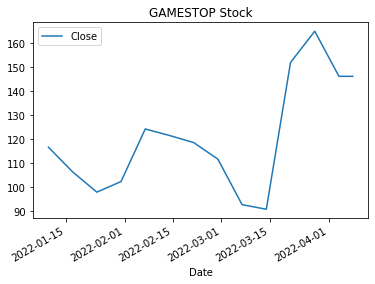

In [114]:
# Function call to plot GME STOCK data

make_graphStck(game_Stck, "GAMESTOP Stock")

In [115]:
# Display of GAMESTOP REVENUE data
game_RevData

,Date,Revenue
0,2021-10-31,"$1,297"
1,2021-07-31,"$1,183"
2,2021-04-30,"$1,277"
3,2021-01-31,"$2,122"
4,2020-10-31,"$1,005"
5,2020-07-31,$942
6,2020-04-30,"$1,021"
7,2020-01-31,"$2,194"
8,2019-10-31,"$1,439"
9,2019-07-31,"$1,286"


In [116]:
game_RevData.dtypes   #game_Stop data type check

Date       object
Revenue    object
dtype: object

In [118]:
# conversion of GME Rev data field to float from Currency 

game_dfCopy = game_RevData.copy()
game_RevData['Revenue'] = game_RevData['Revenue'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)


In [119]:
# Display of GME Revenue column conversion

game_RevData

,Date,Revenue
0,2021-10-31,1297.0
1,2021-07-31,1183.0
2,2021-04-30,1277.0
3,2021-01-31,2122.0
4,2020-10-31,1005.0
5,2020-07-31,942.0
6,2020-04-30,1021.0
7,2020-01-31,2194.0
8,2019-10-31,1439.0
9,2019-07-31,1286.0


In [120]:
# Function to plot GME REV data

def make_graphRev(df, name):   
    df_Cpy = df.copy()
    
    df.reset_index(drop=True)    
    return df.plot(x= "Date", y= "Revenue", title=name)
 

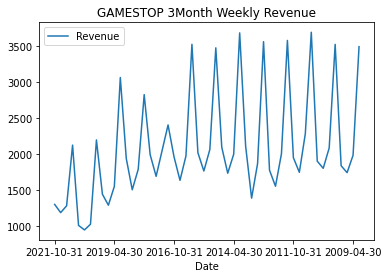

In [121]:
# Function call to ploy GME REVENUE data

make_graphRev(game_RevData, "GAMESTOP 3Month Weekly Revenue")